<a href="https://colab.research.google.com/github/alcarnielo/Bootcamp_Alura/blob/main/Modulo_02%5CModulo_02_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 02 - Aula 02 - Parte 01

In [2]:
import pandas as pd

In [3]:
sus = 'https://raw.githubusercontent.com/alcarnielo/Bootcamp_Alura/main/Modulo_02/A200857189_28_143_208.csv'
wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
data = '2020/Jun'

# Ler base direto do wikipedia
populacao = pd.read_html(wiki, thousands=' ', )[0]

# Ajustar apenas os dados desejados
populacao  = populacao[['Unidade federativa', 'População']]
populacao.columns = ['uf', 'populacao']
populacao.index = populacao.uf
populacao= pd.DataFrame(populacao.populacao)

# Ler fonte do SUS
dados = pd.read_csv(sus, sep=';', encoding='ISO-8859-1', index_col=0,
                    skiprows=3, skipfooter=12, 
                    thousands='.', decimal=',', na_values='-')
gastos_mais_recentes = pd.DataFrame(dados[data])
gastos_mais_recentes.index = gastos_mais_recentes.index.str[3:]

populacao.index = populacao.index.sort_values()
gastos_mais_recentes.index = gastos_mais_recentes.index.sort_values()

gastos_mais_recentes = gastos_mais_recentes.join(populacao)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [4]:
# criar coluna de gastos por habitante
gastos_mais_recentes['gastos'] = gastos_mais_recentes[data]
gastos_mais_recentes['gastos_por_habitante'] = gastos_mais_recentes['gastos']/gastos_mais_recentes['populacao']
gastos_mais_recentes = gastos_mais_recentes.sort_values(by='gastos', ascending=False)

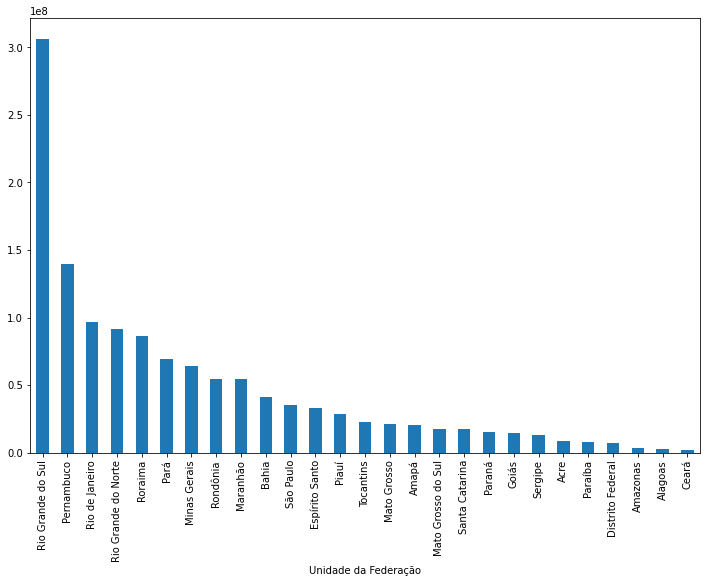

In [5]:
# plotar gastos
gastos_mais_recentes['gastos'].plot(figsize=(12,8),kind='bar')

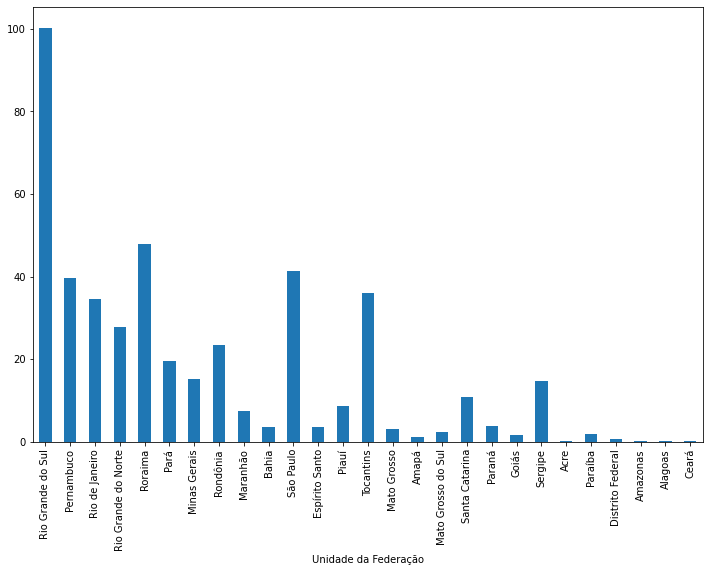

In [6]:
gastos_mais_recentes['gastos_por_habitante'].plot(figsize=(12,8),kind='bar')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

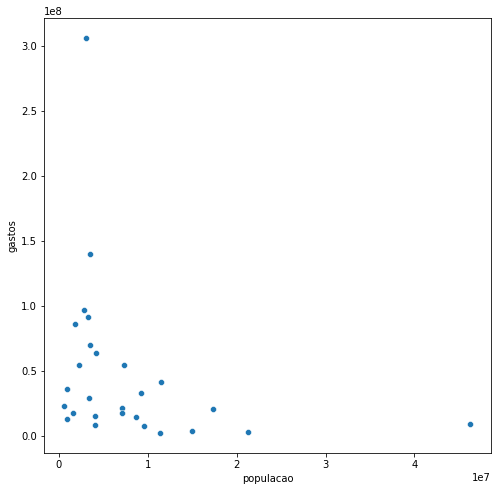

In [8]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=gastos_mais_recentes, x='populacao', y='gastos')


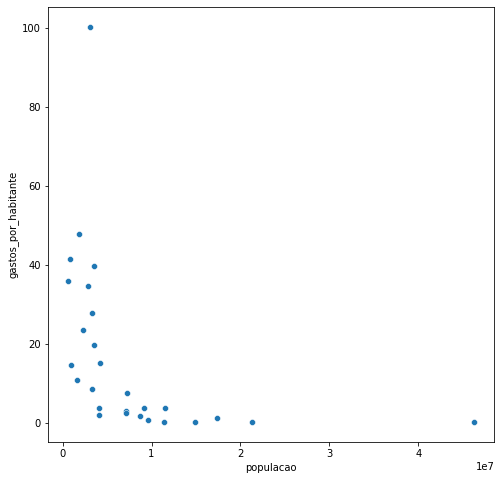

In [9]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=gastos_mais_recentes, x='populacao', y='gastos_por_habitante')

## Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

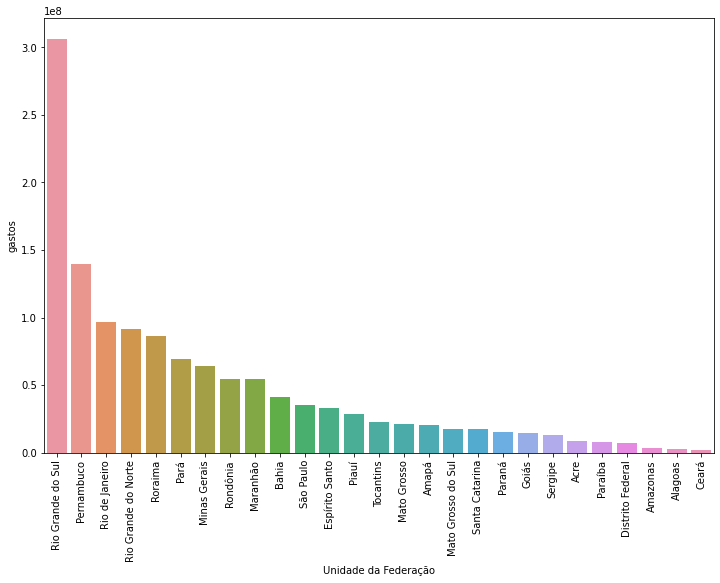

In [10]:
plt.figure(figsize=(12,8))
ax = sns.barplot(
                 data=gastos_mais_recentes, x=gastos_mais_recentes.index, y='gastos', 
                 )
ax.set_xticklabels(labels=gastos_mais_recentes.index,
                   rotation=90)
plt.show()

## Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

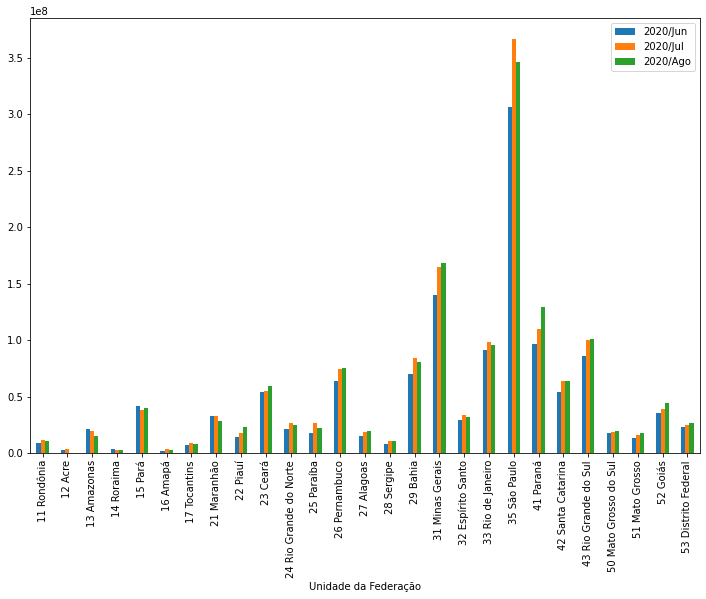

In [11]:
dados.loc[:, '2020/Jun':'2020/Ago'].plot(kind='bar', figsize=(12,8))

In [12]:
dados.index = dados.index.str[3:]
populacao = pd.read_html(wiki, thousands=' ', index_col=1)[0]
populacao = populacao.iloc[:,1:2]

In [13]:
dados['populacao'] = populacao

In [14]:
dados = dados.sort_values(by='Total', ascending=False)
meses = dados.loc[:,'2020/Jan':'2020/Ago'].columns
dados_prop = dados[meses].T/dados['populacao']

Text(0, 0.5, 'Gastos/Habitante \n')

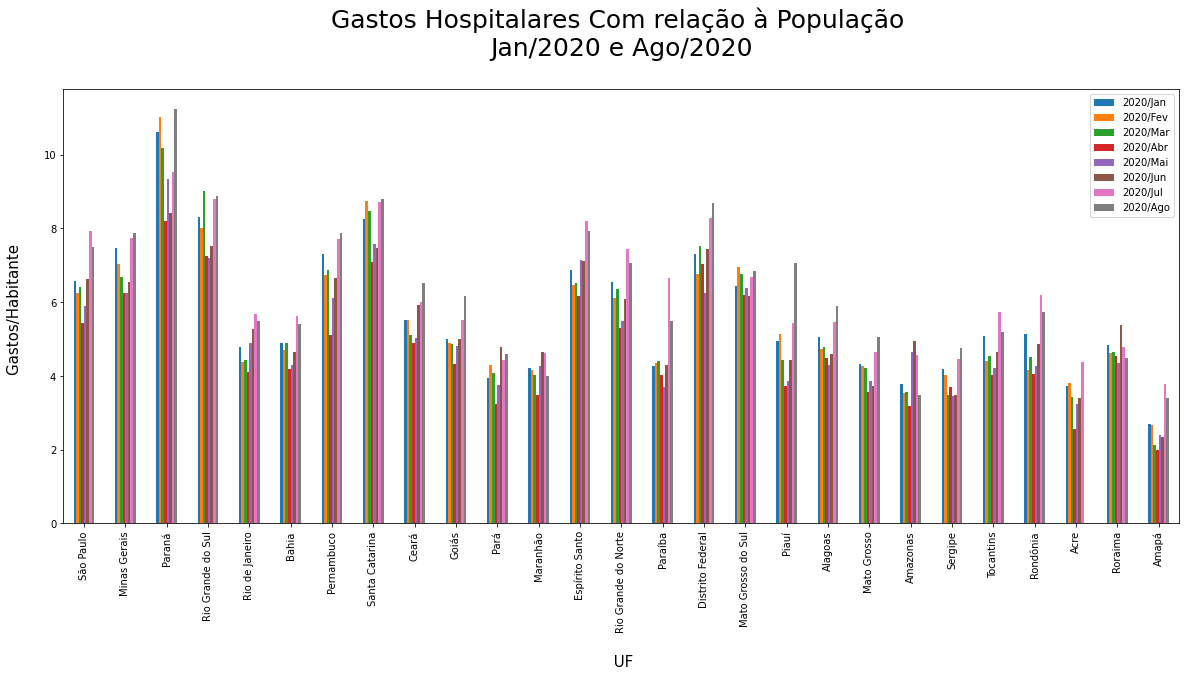

In [15]:
dados_prop.T.plot(kind='bar', figsize=(20,8), 
                  )
plt.legend(bbox_to_anchor=(1,1))
plt.title('''Gastos Hospitalares Com relação à População 
Jan/2020 e Ago/2020
''', fontsize=25)
plt.xlabel('\n UF',fontsize=15)
plt.ylabel('Gastos/Habitante \n',fontsize=15)

Text(0, 0.5, 'Gastos/Habitante \n')

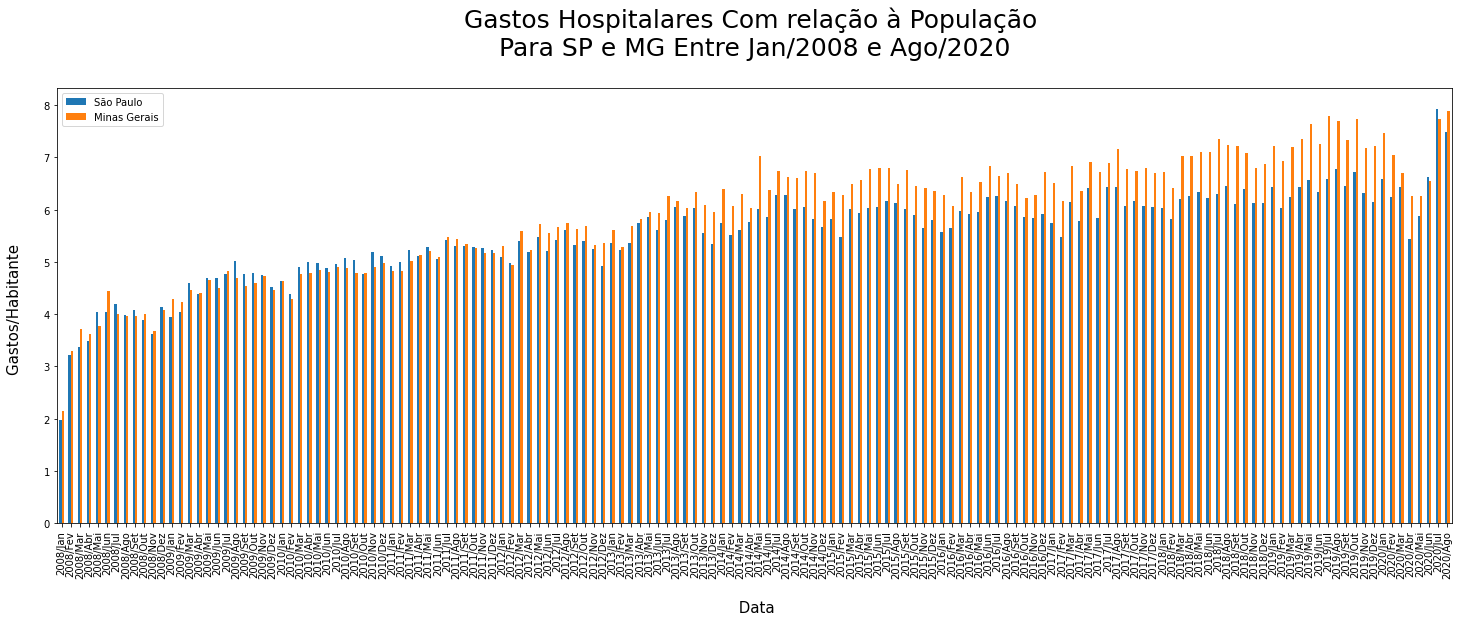

In [39]:
dados = dados.sort_values(by='Total', ascending=False)
dados_prop = dados[meses[:-2]].T/dados['populacao']

dados_prop[['São Paulo', 'Minas Gerais']].plot(kind='bar', figsize=(25,8))
plt.legend(
#           bbox_to_anchor=(1,1)
           )
plt.title('''Gastos Hospitalares Com relação à População 
Para SP e MG Entre Jan/2008 e Ago/2020
''', fontsize=25)
plt.xlabel('\n Data',fontsize=15)
plt.ylabel('Gastos/Habitante \n',fontsize=15)

No handles with labels found to put in legend.


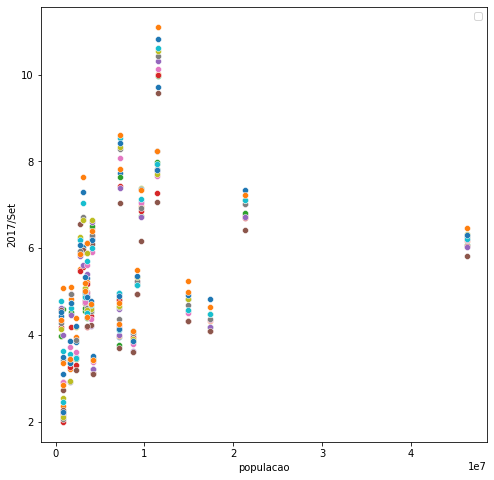

In [65]:
plt.figure(figsize=(8,8))
for m in dados_prop.index[-36:-24]:
    sns.scatterplot(x=dados.populacao, y=dados_prop.loc[m])
plt.legend(bbox_to_anchor=(1,1), ncol=3)

# Módulo 02 - Aula 02 - Parte 03

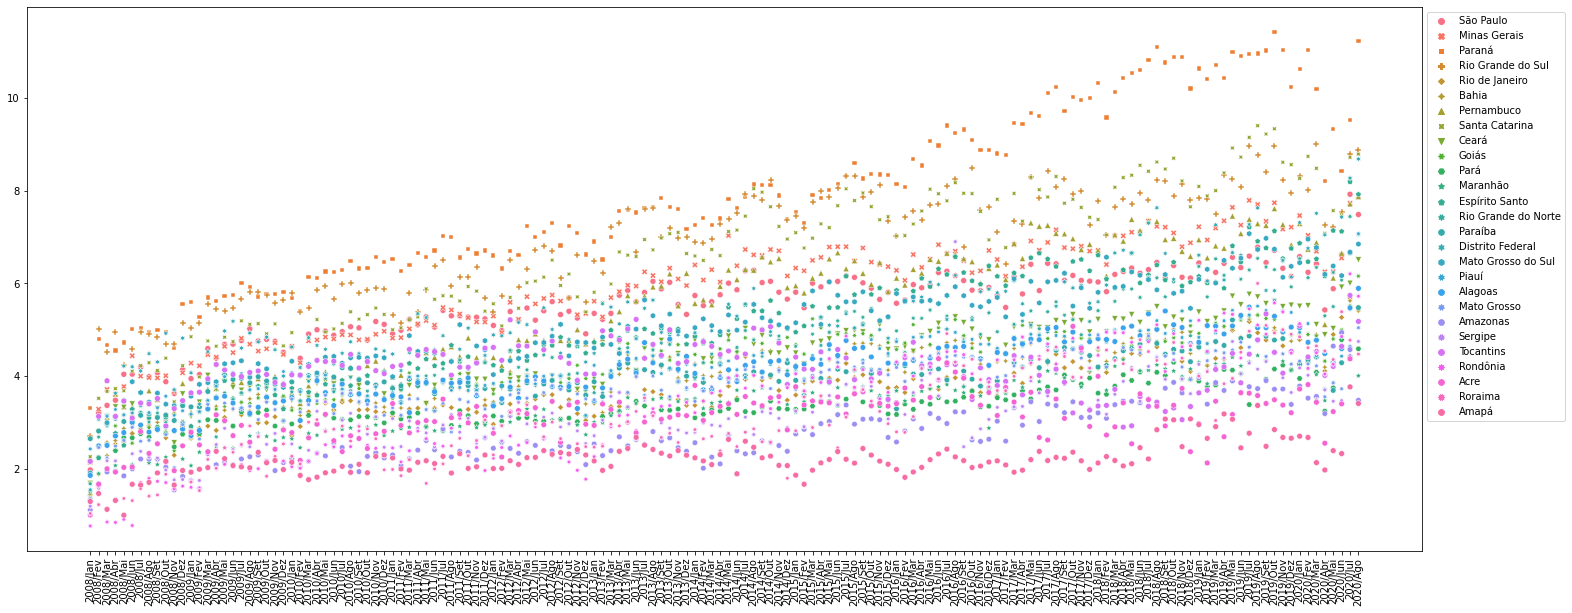

In [73]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=dados_prop)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

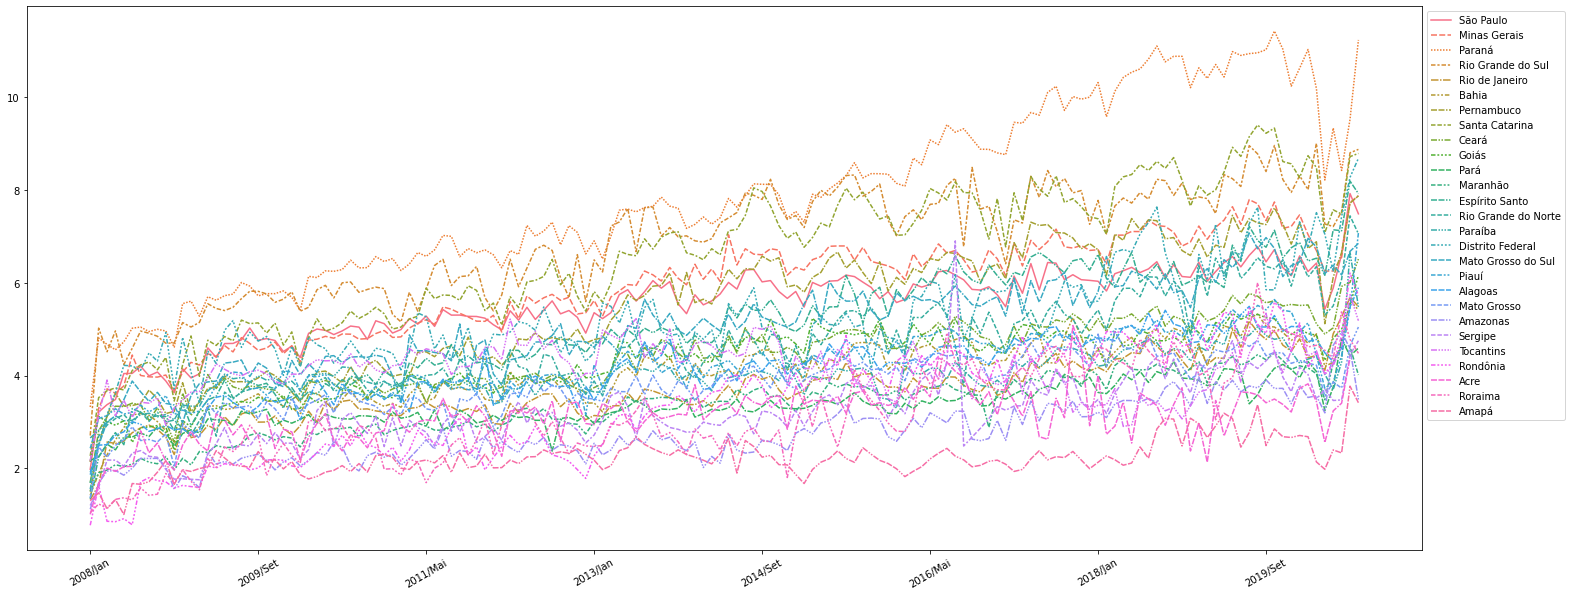

In [86]:
import matplotlib.ticker as ticker
plt.figure(figsize=(25,10))
ax = sns.lineplot(data=dados_prop)
ax.legend(bbox_to_anchor=(1,1))
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.xticks(rotation=30)
plt.show()

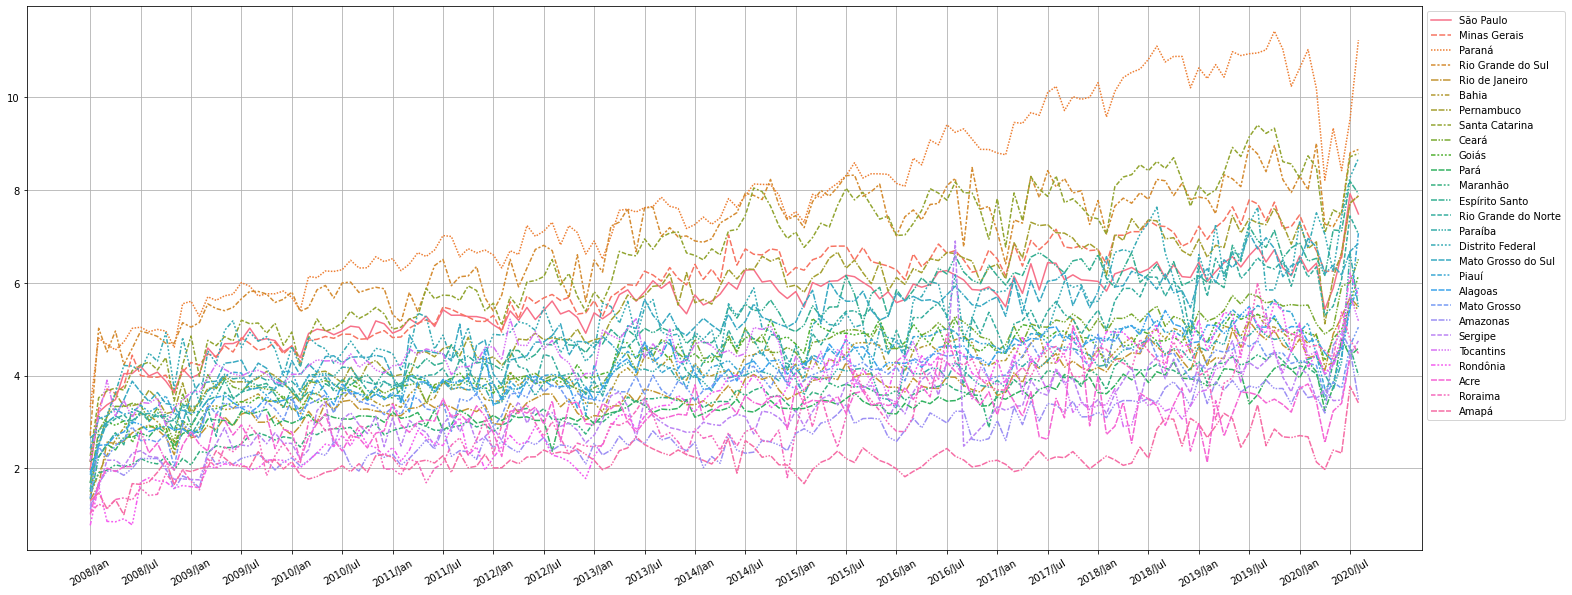

In [90]:
import matplotlib.ticker as ticker
plt.figure(figsize=(25,10))
ax = sns.lineplot(data=dados_prop)
ax.legend(bbox_to_anchor=(1,1))
ax.xaxis.set_major_locator(ticker.IndexLocator(offset=0, base=6))
plt.xticks(rotation=30)
plt.grid()
plt.show()

## Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

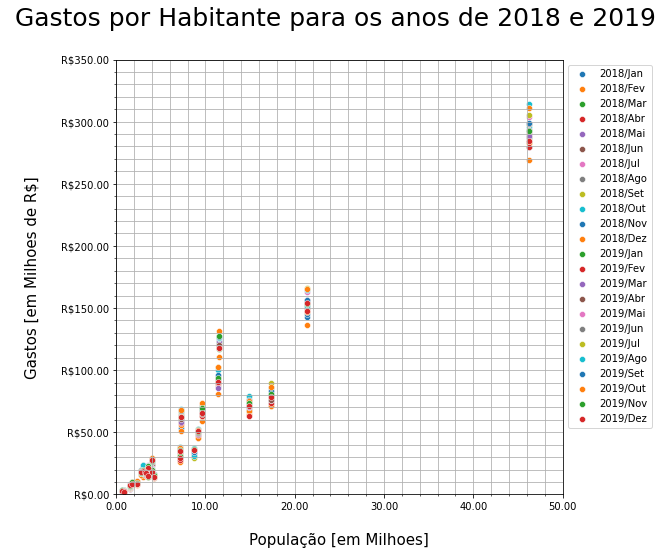

In [150]:
import numpy as np
columns = dados.columns[-34:-10]
fator=1e6
plt.figure(figsize=(8,8))
for m in columns:
    ax = sns.scatterplot(x=dados.populacao/fator, y=dados[m]/fator, label=m)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

ax.set_xticks(np.arange(0,100,2), minor=True)
ax.set_yticks(np.arange(0,350,10), minor=True)

ax.set_ylim(0, 350)
ax.set_xlim(0,50)

ax.grid(which='both')

ax.set_title('Gastos por Habitante para os anos de 2018 e 2019 \n', 
             fontsize=25)
ax.set_xlabel('\nPopulação [em Milhoes]',
              fontsize=15)
ax.set_ylabel('\nGastos [em Milhoes de R$]\n',
              fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

No handles with labels found to put in legend.


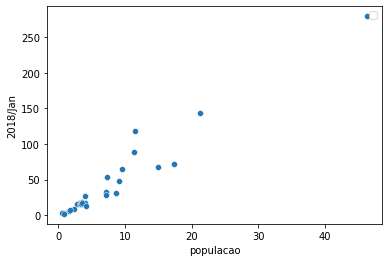